<a href="https://colab.research.google.com/github/GreenStreetQuant/Stock-Returns-consistency-/blob/master/stockreturnsconsistency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Would you like to analyze a Stock's returns?yes
Enter the Ticker of the Stock
 :aapl
Enter Start Date in YYYY-MM-DD Format 
 :2018-10-01
Enter End Date in YYYY-MM-DD Format 
 :2020-01-22
What frequency of returns to analyze? Daily, Weekly, or Monthlydaily


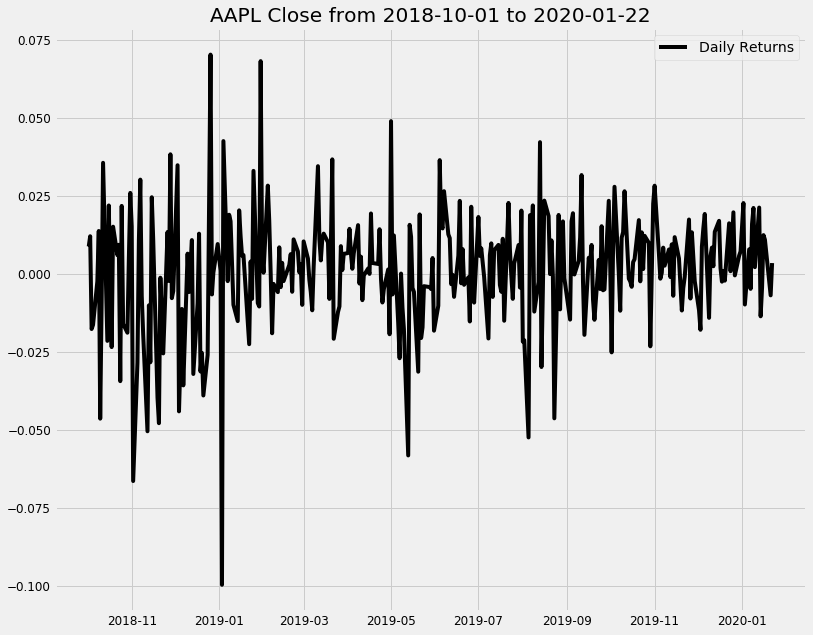

The daily returns are: Date
2018-10-02    1.0
2018-10-03    1.0
2018-10-04   -2.0
2018-10-05   -2.0
2018-10-08   -0.0
             ... 
2020-01-15   -0.0
2020-01-16    1.0
2020-01-17    1.0
2020-01-21   -1.0
2020-01-22    0.0
Name: Close, Length: 328, dtype: float64%
The Daily return Standard Deviation is: 0.0186
The daily return mean is: 0.0%
The daily max return is: 7.000000000000001%
The daily min return is: -10.0%
Would you like to look at another Frequency?yes
What frequency of returns to analyze? Daily, Weekly, or Monthlyweekly


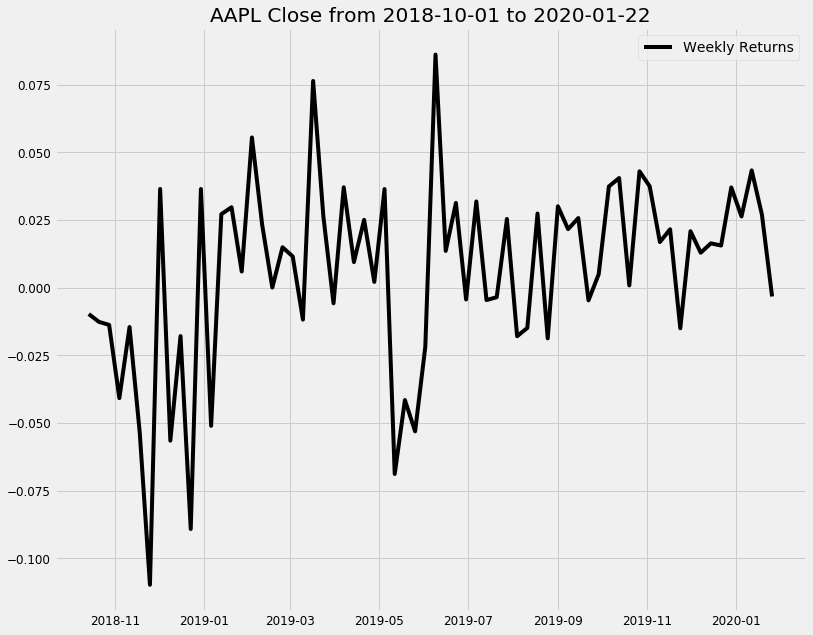

The weekly returns are: Date
2018-10-14   -0.97
2018-10-21   -1.26
2018-10-28   -1.37
2018-11-04   -4.08
2018-11-11   -1.45
              ... 
2019-12-29    3.71
2020-01-05    2.63
2020-01-12    4.34
2020-01-19    2.71
2020-01-26   -0.32
Freq: W-SUN, Name: Close, Length: 68, dtype: float64%
The weekly return Standard Deviation is: 0.0355
The weekly return mean is: 1.0%
The weekly max return is: 9.0%
The weekly min return is: -11.0%
Would you like to look at another Frequency?yes
What frequency of returns to analyze? Daily, Weekly, or Monthlymonthly


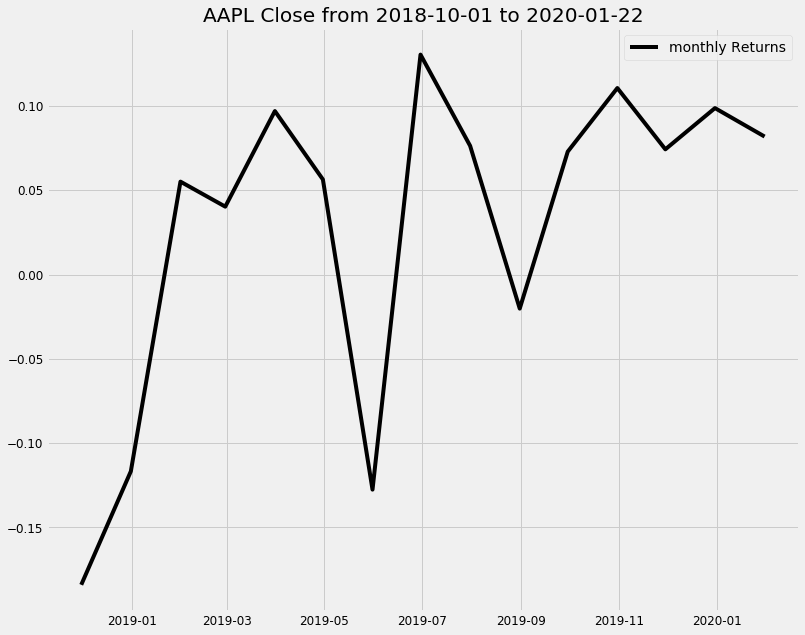

The weekly returns are: Date
2018-11-30   -18.40
2018-12-31   -11.67
2019-01-31     5.52
2019-02-28     4.03
2019-03-31     9.70
2019-04-30     5.64
2019-05-31   -12.76
2019-06-30    13.05
2019-07-31     7.64
2019-08-31    -2.02
2019-09-30     7.30
2019-10-31    11.07
2019-11-30     7.43
2019-12-31     9.88
2020-01-31     8.19
Freq: M, Name: Close, dtype: float64%
The monthly return Standard Deviation is: 0.0966
The monthly return mean is: 3.0%
The monthly max return is: 13.0%
The monthly min return is: -18.0%
Would you like to look at another Frequency?no
Do you want to look at another stock? :no


In [54]:
from pandas_datareader import data 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

#function to fetch the stock price
def get_prices(ticker):
	for stck in ticker:
		ticker = data.DataReader(ticker, 'yahoo', start_date, end_date)
		ticker = ticker.drop(columns=['Adj Close'])
		return ticker

#function to plot weekly returns 
def plot_weekly(chart):

  weekly_returns = data['Close'].resample('W').ffill().pct_change().dropna()

  plt.figure(figsize=(12,10))
  return1 = plt.plot(weekly_returns, color='black', label='Weekly Returns')
  plt.legend(loc='best')
  plt.title(f'{ticker} Close from {start_date} to {end_date}')
  plt.show(block=False)

#function to plot monthly returns
def plot_monthly(chart):

  monthly_returns = data['Close'].resample('M').ffill().pct_change().dropna()

  plt.figure(figsize=(12,10))
  return1 = plt.plot(monthly_returns, color='black', label='monthly Returns')
  plt.legend(loc='best')
  plt.title(f'{ticker} Close from {start_date} to {end_date}')
  plt.show(block=False)

#function to plot daily returns
def plot_daily(chart):

  daily_returns = data['Close'].pct_change().dropna()

  plt.figure(figsize=(12,10))
  return1 = plt.plot(daily_returns, color='black', label='Daily Returns')
  plt.legend(loc='best')
  plt.title(f'{ticker} Close from {start_date} to {end_date}')
  plt.show(block=False)

#function to print daily returns below chart
def returns_daily(ticker):

  daily_returns = round(data['Close'].pct_change().dropna(),2)

  print(f'The daily returns are: {daily_returns * 100}%')

#function to print weekly returns
def returns_weekly(ticker):

  weekly_returns = round(data['Close'].resample('W').ffill().pct_change().dropna(),4)

  print(f'The weekly returns are: {weekly_returns * 100}%')

#function to print monthly returns
def returns_monthly(ticker):

  monthly_returns = round(data['Close'].resample('M').ffill().pct_change().dropna(),4)

  print(f'The weekly returns are: {monthly_returns * 100}%')

#get the standard deviation of daily returns
def stdev_daily(ticker):

  daily_returns = data['Close'].pct_change().dropna()

  daily_std = round(daily_returns.std(),4)

  print(f'The Daily return Standard Deviation is: {daily_std}')


#get the standard deviation of weekly returns
def stdev_weekly(ticker):

  weekly_returns = data['Close'].resample('W').ffill().pct_change().dropna()

  weekly_std = round(weekly_returns.std(),4)

  print(f'The weekly return Standard Deviation is: {weekly_std}')

#get the standard deviation of monthly returns
def stdev_monthly(ticker):

  monthly_returns = data['Close'].resample('M').ffill().pct_change().dropna()

  monthly_std = round(monthly_returns.std(),4)

  print(f'The monthly return Standard Deviation is: {monthly_std}')

#get the mean of the daily returns and min/max 
def mean_daily(ticker):

  daily_returns = data['Close'].pct_change().dropna()

  daily_mean = round(daily_returns.mean(),2)

  daily_mean_max = round(daily_returns.max(),2)

  daily_mean_min = round(daily_returns.min(),2)

  print(f'The daily return mean is: {daily_mean * 100}%')
  print(f'The daily max return is: {daily_mean_max * 100}%')
  print(f'The daily min return is: {daily_mean_min * 100}%')


#get the mean of the weekly returns and min/max 
def mean_weekly(ticker):

  weekly_returns = data['Close'].resample('W').ffill().pct_change().dropna()

  weekly_mean = round(weekly_returns.mean(),2)

  weekly_mean_max = round(weekly_returns.max(),2)

  weekly_mean_min = round(weekly_returns.min(),2)

  print(f'The weekly return mean is: {weekly_mean * 100}%')
  print(f'The weekly max return is: {weekly_mean_max * 100}%')
  print(f'The weekly min return is: {weekly_mean_min * 100}%')

#get the mean of the monthly returns and min/max
def mean_monthly(ticker):

  monthly_returns = data['Close'].resample('M').ffill().pct_change().dropna()

  monthly_mean = round(monthly_returns.mean(),2)

  monthly_mean_max = round(monthly_returns.max(),2)

  monthly_mean_min = round(monthly_returns.min(),2)

  print(f'The monthly return mean is: {monthly_mean * 100}%')
  print(f'The monthly max return is: {monthly_mean_max * 100}%')
  print(f'The monthly min return is: {monthly_mean_min * 100}%')


#function to look at another stock
def replay():
  return input('Do you want to look at another stock? :').lower().startswith('y')

while True:

  run_analysis = str(input('Would you like to analyze a Stock\'s returns?').lower())

  if run_analysis[0] == 'y':
    analysis_on = True
  else:
    analysis_on = False
    break

  while analysis_on:
    
    ticker = str(input('Enter the Ticker of the Stock\n :').upper())

    start_date = str(input('Enter Start Date in YYYY-MM-DD Format \n :'))

    end_date = str(input('Enter End Date in YYYY-MM-DD Format \n :'))

    data = get_prices(ticker)

    while True:

      return_choice = str(input('What frequency of returns to analyze? Daily, Weekly, or Monthly')).lower()
    
      if return_choice == 'daily':
        plot_daily(data)
        returns_daily(data)
        stdev_daily(data)
        mean_daily(data)
      elif return_choice == 'weekly':
        plot_weekly(data)
        returns_weekly(data)
        stdev_weekly(data)
        mean_weekly(data)
      else:
        plot_monthly(data)
        returns_monthly(data)
        stdev_monthly(data)
        mean_monthly(data)

      
      dif_freq = str(input('Would you like to look at another Frequency?')).lower()

      if dif_freq[0] =='y':
        continue
      else:
        replay()
        break

    break
  break















